## 웹크롤링

#### 웹크롤링 툴 selenium install 하기

In [2]:
! pip install selenium

In [3]:
from selenium import webdriver
webdriver.__version__

'4.1.0'

In [4]:
# 크롬 95버전 이상일 경우
from selenium.webdriver.chrome.service import Service

In [5]:
ser = Service('../chromedriver/chromedriver.exe')

In [6]:
driver = webdriver.Chrome(service = ser)

In [7]:
url = 'https://www.naver.com/'
driver.get(url)

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url
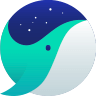
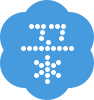

In [8]:
html = driver.page_source
html

### html 구조 파악하기

In [9]:
# 예제 2-39 HTML 구조
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''

In [10]:
html

"\n<html>\n    <head>\n    </head>\n    <body>\n        <h1> 우리동네시장</h1>\n            <div class = 'sale'>\n                <p id='fruits1' class='fruits'>\n                    <span class = 'name'> 바나나 </span>\n                    <span class = 'price'> 3000원 </span>\n                    <span class = 'inventory'> 500개 </span>\n                    <span class = 'store'> 가나다상회 </span>\n                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n                </p>\n            </div>\n            <div class = 'prepare'>\n                <p id='fruits2' class='fruits'>\n                    <span class ='name'> 파인애플 </span>\n                </p>\n            </div>\n    </body>\n</html>\n"

In [11]:
! pip install bs4

In [12]:
from bs4 import BeautifulSoup

In [13]:
soup = BeautifulSoup(html, 'html.parser')
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

#### HTML 정보찾기 - 태그 속성 활용

In [14]:
tags_span = soup.select('span')
print(len(tags_span))   # <span> ~ </span> 까지가 하나
type(tags_span)

5


bs4.element.ResultSet

In [15]:
tags_p = soup.select('p')   # <p> ~ </p> 까지가 하나
len(tags_p)

2

In [16]:
soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [17]:
# class
print(soup.select('.price'))
print(soup.select('.inventory'))
print(soup.select('.name'))
print(soup.select('span.name'))   # sapn : tag / name : class

[<span class="price"> 3000원 </span>]
[<span class="inventory"> 500개 </span>]
[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]
[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]


#### HTML 정보찾기 - 상위구조 활용

In [18]:
print(soup.select('#fruits1 > span.name'))
print(soup.select('div.sale > #fruits1 > span.name'))
print(soup.select('div.sale > p.fruits > span.name'))
print(soup.select('div.sale span.name'))  
# 중간 태그 생략(최상위태그와 최하위 태그만 사용) 시' ' 사용

[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


#### 정보가져오기

In [19]:
name = soup.select('span.name')
#len(name)

name_0 = name[0]
name_1 = name[1]

print(name_0)
print(name_1)

print(name_0.text)     
print(name_1.text)

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>
 바나나 
 파인애플 


#### 정보 가져오기 - url

In [20]:
tags_a = soup.select('a')

print('tags_a : ', tags_a)
print('type(tags_a) : ', type(tags_a))
print('type(tags_a[0]) : ',type(tags_a[0]))

print('tags_a[0].text : ', tags_a[0].text)
tags_a[0]['href']

tags_a :  [<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>]
type(tags_a) :  <class 'bs4.element.ResultSet'>
type(tags_a[0]) :  <class 'bs4.element.Tag'>
tags_a[0].text :   홈페이지 


'http://bit.ly/forPlaywithData'

#### 웹크롤링 실습하기(멜론, 네이버)

##### 네이버 가져오기

In [21]:
url = 'https://www.naver.com/'
driver.get(url)

<html data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36" lang="ko"><head><script async="" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js" type="text/javascript"></script> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta conten
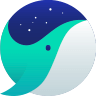
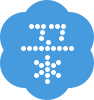

In [22]:
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
soup

##### 멜론 가져오기

In [23]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

In [24]:
ser = Service('../chromedriver/chromedriver.exe')

driver = webdriver.Chrome(service = ser)

In [25]:
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

In [26]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1" name="naver-site-verification"/>
<meta content="5IbZkQIBKFswwVZeAGJ2Fx3kg6aF8RTAGEU6wlsOWLk" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<me

In [28]:
songs = soup.select('tr')  #wrap_song_info
len(songs)
songs_list = songs[1:]
len(songs_list)

songs = soup.select('tbody > tr')
songs

[<tr class="lst50" data-song-no="34431086" id="lst50">
 <td><div class="wrap t_right"><input class="input_check" name="input_check" title="취중고백 곡 선택" type="checkbox" value="34431086"/></div></td>
 <td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
 <!-- 차트순위 추가 -->
 <td><div class="wrap">
 <span class="rank_wrap" title="순위 동일">
 <span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
 <span class="none">0</span>
 </span>
 </div></td>
 <td><div class="wrap">
 <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10816959');" title="취중고백">
 <img alt="취중고백 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/108/16/959/10816959_20211217144957_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>
 </div></td>
 <td><div class="wrap">
 <a class="btn button_icons type03 song_info" href="javascript:melon.